# Аникин Дмитрий
# 80-306

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from pylab import rcParams

rcParams['figure.figsize'] = 8, 5

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
data1 = pd.read_csv('global_co2.csv')
data2 = pd.read_csv('challenge_dataset.txt', sep=',', names=['X', 'Y'])
data3 = pd.read_csv('quandl_dataset.csv')

In [4]:
print('Размера датасета 1: ', data1.shape)
data1.head()

Размера датасета 1:  (260, 8)


,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN


In [5]:
data1.isnull().any()

Year           False
Total          False
Gas Fuel       False
Liquid Fuel    False
Solid Fuel     False
Cement         False
Gas Flaring    False
Per Capita      True
dtype: bool

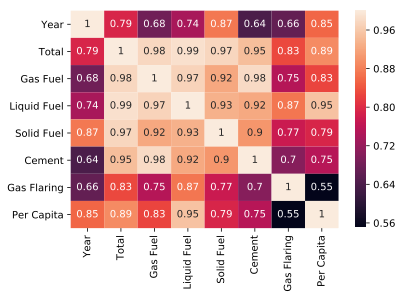

In [6]:
sns.heatmap(data1.corr(), annot=True)

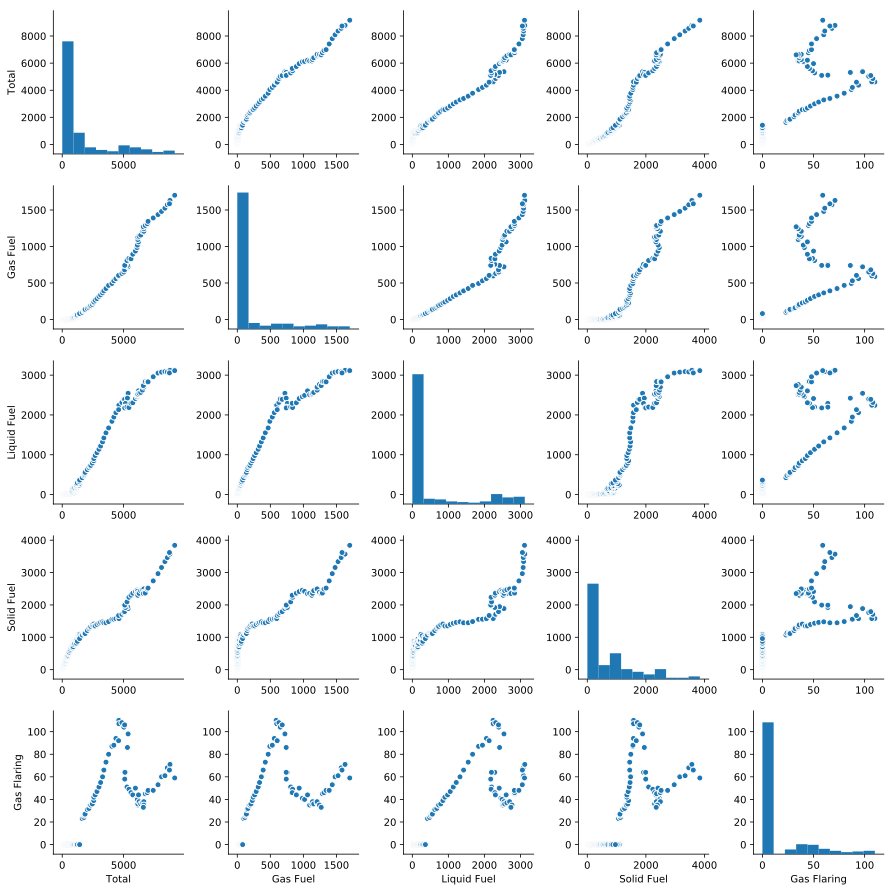

In [7]:
useful_cols = ['Total', 'Gas Fuel', 'Liquid Fuel', 'Solid Fuel', 'Gas Flaring']
sns.pairplot(data1[useful_cols])

In [25]:
model1 = LinearRegression()
train_x, test_x, train_y, test_y = train_test_split(data1[useful_cols[:-1]],
                                                    data1['Gas Flaring'],
                                                    test_size=0.65, shuffle=True)

In [26]:
model1.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
pred_y = model1.predict(test_x)

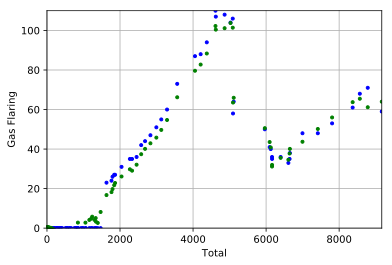

In [19]:
plt.figure()
plt.xlabel('Total')
plt.ylabel('Gas Flaring')
plt.plot(test_x['Total'], test_y, 'b.')
plt.plot(test_x['Total'], pred_y, 'g.')
plt.axis([0, max(test_x['Total']), 0, max(test_y)])
plt.grid(True)
plt.show()

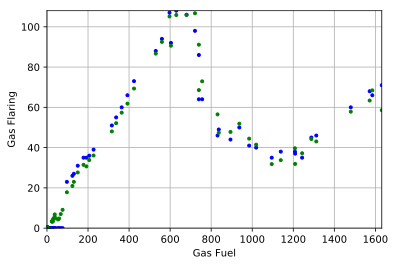

In [10]:
plt.figure()
plt.xlabel('Gas Fuel')
plt.ylabel('Gas Flaring')
plt.plot(test_x['Gas Fuel'], test_y, 'b.')
plt.plot(test_x['Gas Fuel'], pred_y, 'g.')
plt.axis([0, max(test_x['Gas Fuel']), 0, max(test_y)])
plt.grid(True)
plt.show()

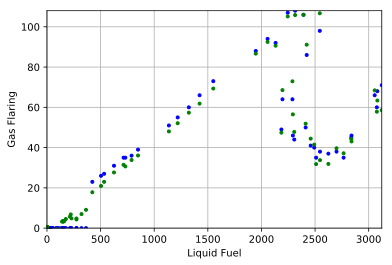

In [11]:
plt.figure()
plt.xlabel('Liquid Fuel')
plt.ylabel('Gas Flaring')
plt.plot(test_x['Liquid Fuel'], test_y, 'b.')
plt.plot(test_x['Liquid Fuel'], pred_y, 'g.')
plt.axis([0, max(test_x['Liquid Fuel']), 0, max(test_y)])
plt.grid(True)
plt.show()

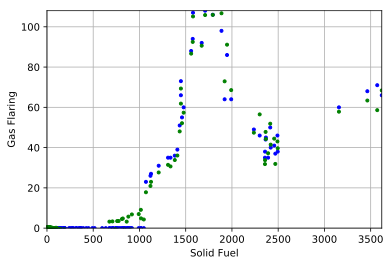

In [12]:
plt.figure()
plt.xlabel('Solid Fuel')
plt.ylabel('Gas Flaring')
plt.plot(test_x['Solid Fuel'], test_y, 'b.')
plt.plot(test_x['Solid Fuel'], pred_y, 'g.')
plt.axis([0, max(test_x['Solid Fuel']), 0, max(test_y)])
plt.grid(True)
plt.show()

In [13]:
print(f'MSE = {mean_squared_error(test_y, pred_y)}')

MSE = 8.292764052022374


In [14]:
pred_y_on_train = model1.predict(train_x)
print(f'MSE = {mean_squared_error(train_y, pred_y_on_train)}')

MSE = 7.330680752849554


In [15]:
print('Размер датасета 2: ', data2.shape)
data2.head()

Размер датасета 2:  (97, 2)


,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [16]:
data2.isnull().any()

X    False
Y    False
dtype: bool

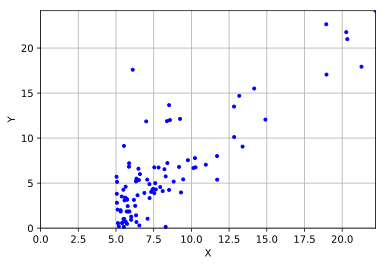

In [17]:
plt.figure()
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(data2['X'], data2['Y'], 'b.')
plt.axis([0, data2['X'].max(), 0, data2['Y'].max()])
plt.grid(True)
plt.show()

In [18]:
model2 = LinearRegression()
train_x, test_x, train_y, test_y = train_test_split(data2[['X']],
                                                    data2['Y'],
                                                    test_size=0.5, shuffle=True)

In [19]:
model2.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
pred_y = model2.predict(test_x)

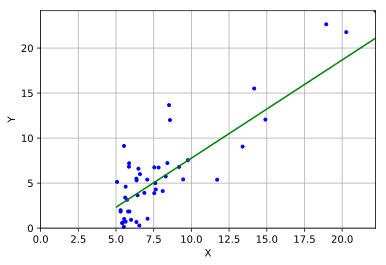

In [21]:
plt.figure()
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(test_x['X'], test_y, 'b.')
plt.plot(test_x['X'], pred_y, 'g')
plt.axis([0, max(test_x['X']), 0, max(test_y)])
plt.grid(True)
plt.show()


In [22]:
print(f'MSE = {mean_squared_error(test_y, pred_y)}')

MSE = 7.946790453723331


In [23]:
pred_y_on_train = model2.predict(train_x)
print(f'MSE = {mean_squared_error(train_y, pred_y_on_train)}')

MSE = 10.305929636391639


In [24]:
print('Размер датасета 3: ', data3.shape)
data3.head()

Размер датасета 3:  (3412, 13)


,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
1,2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2,2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
3,2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
4,2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [25]:
data3.isnull().any()

Date           False
Open           False
High           False
Low            False
Close          False
Volume         False
Ex-Dividend    False
Split Ratio    False
Adj. Open      False
Adj. High      False
Adj. Low       False
Adj. Close     False
Adj. Volume    False
dtype: bool

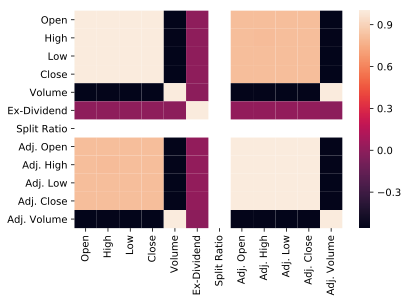

In [26]:
sns.heatmap(data3.corr())

In [27]:
model3 = LinearRegression()
train_x, test_x, train_y, test_y = train_test_split(data3[['Open', 'High', 'Low']],
                                                    data3['Close'],
                                                    test_size=0.65, shuffle=True)

In [28]:
model3.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
pred_y = model3.predict(test_x)

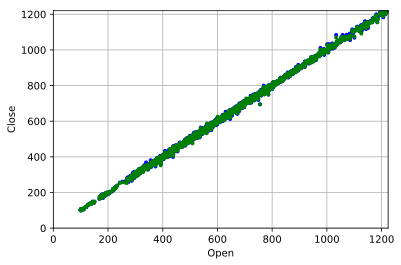

In [30]:
plt.figure()
plt.xlabel('Open')
plt.ylabel('Close')
plt.plot(test_x['Open'], test_y, 'b.')
plt.plot(test_x['Open'], pred_y, 'g.')
plt.axis([0, max(test_x['Open']), 0, max(test_y)])
plt.grid(True)
plt.show()


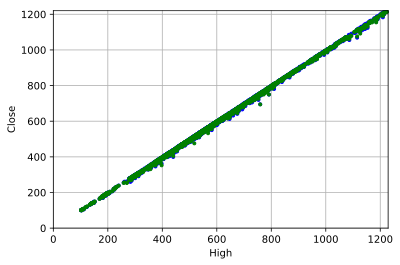

In [31]:
plt.figure()
plt.xlabel('High')
plt.ylabel('Close')
plt.plot(test_x['High'], test_y, 'b.')
plt.plot(test_x['High'], pred_y, 'g.')
plt.axis([0, max(test_x['High']), 0, max(test_y)])
plt.grid(True)
plt.show()


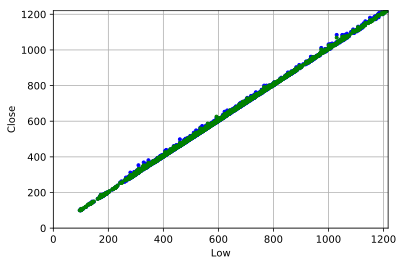

In [32]:
plt.figure()
plt.xlabel('Low')
plt.ylabel('Close')
plt.plot(test_x['Low'], test_y, 'b.')
plt.plot(test_x['Low'], pred_y, 'g.')
plt.axis([0, max(test_x['Low']), 0, max(test_y)])
plt.grid(True)
plt.show()


In [33]:
print(f'MSE = {mean_squared_error(test_y, pred_y)}')

MSE = 12.235950609565172


In [34]:
pred_y_on_train = model3.predict(train_x)
print(f'MSE = {mean_squared_error(train_y, pred_y_on_train)}')

MSE = 12.163299973523712
